In [149]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fminbound
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

def entropy(x, base=np.exp(1)):
    xx = x + 1e-6*np.subtract(x==0, x==1, dtype=np.float)
    return (-x*np.log(xx)-(1-x)*np.log(1-xx)) / np.log(base)

def Fm(beta, h, m):
    return -1/2*m**2 - h*m - 1/beta * entropy((1+m)/2)

def find_m_star(beta, h):
    return fminbound(lambda m: Fm(beta, h, m), -1, 1, disp=False)

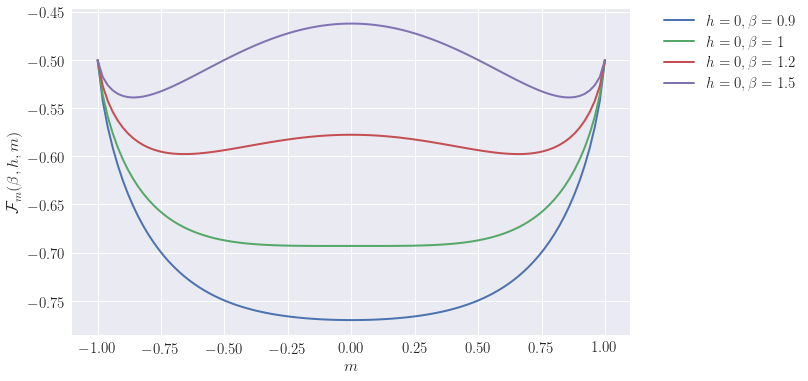

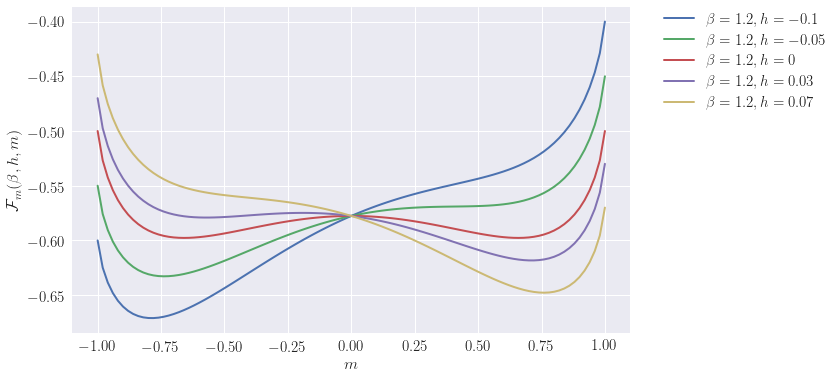

In [153]:
# Problem 2 (a) - (a)
m = np.linspace(-1,1,101)
h, beta_list = 0, [0.9,1,1.2,1.5]
plt.figure(figsize=(10,6))
for beta in beta_list:
    plt.plot(m, Fm(beta, h, m), label=r'$h = {0}, \beta = {1}$'.format(h, beta), linewidth=2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$m$')
plt.ylabel(r'$\mathcal{F}_m(\beta, h, m)$')
plt.savefig('hw1_2(a)_1.pdf', bbox_inches='tight')

# Problem 2 (a) - (b)
m = np.linspace(-1,1,101)
beta, h_list = 1.2, [-0.1, -0.05, 0, 0.03, 0.07]
plt.figure(figsize=(10,6))
for h in h_list:
    plt.plot(m, Fm(beta, h, m), label=r'$\beta = {1}, h = {0}$'.format(h, beta), linewidth=2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$m$')
plt.ylabel(r'$\mathcal{F}_m(\beta, h, m)$')
plt.savefig('hw1_2(a)_2.pdf', bbox_inches='tight')

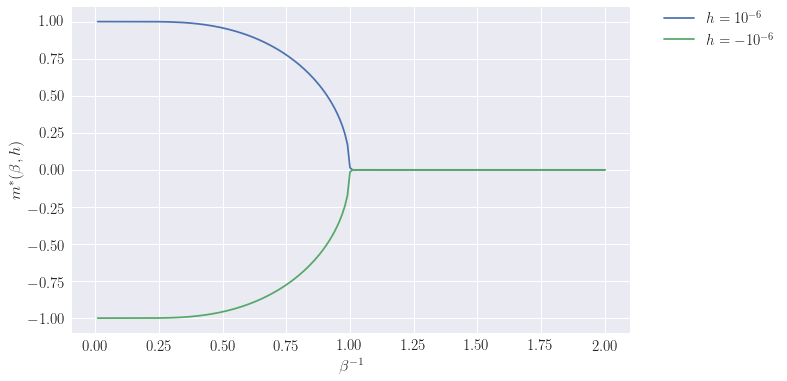

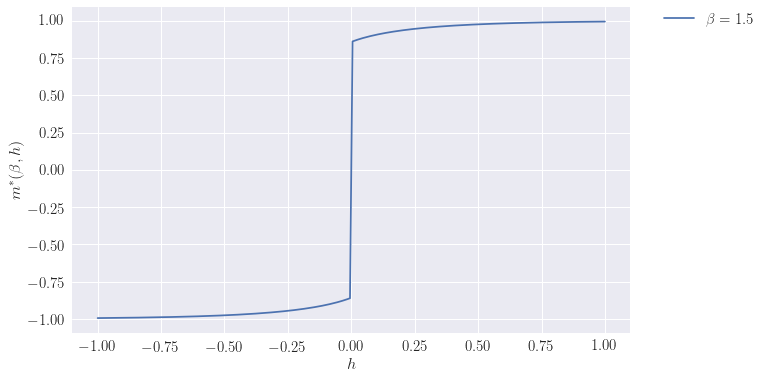

In [156]:
# Problem 2 (b) - (a) (b)
T_list = np.linspace(0.01,2,200)
m_star_pos = np.fromiter((find_m_star(1/T, 1e-6) for T in T_list), float)
m_star_neg = np.fromiter((find_m_star(1/T, -1e-6) for T in T_list), float)
plt.figure(figsize=(10,6))
plt.plot(T_list, m_star_pos, label=r'$h = 10^{-6}$')
plt.plot(T_list, m_star_neg, label=r'$h = -10^{-6}$')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$\beta^{-1}$')
plt.ylabel(r'$m^*(\beta,h)$')
plt.savefig('hw1_2(b)_1,2.pdf', bbox_inches='tight')

# Problem 2 (b) - (c)
beta, h_list = 1.5, np.linspace(-1,1,200)
m_star = np.fromiter((find_m_star(beta, h) for h in h_list), float)
plt.figure(figsize=(10,6))
plt.plot(h_list, m_star, label=r'$\beta = {0}$'.format(beta))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$h$')
plt.ylabel(r'$m^*(\beta,h)$')
plt.savefig('hw1_2(b)_3.pdf', bbox_inches='tight')

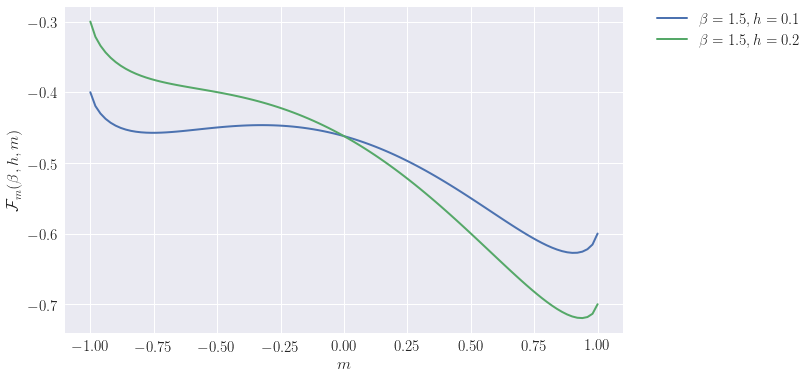

In [157]:
# Problem 3 (c)
m, beta, h1, h2 = np.linspace(-1,1,101), 1.5, 0.1, 0.2
plt.figure(figsize=(10,6))
plt.plot(m, Fm(beta, h1, m), label=r'$\beta = {1}, h = {0}$'.format(h1, beta), linewidth=2)
plt.plot(m, Fm(beta, h2, m), label=r'$\beta = {1}, h = {0}$'.format(h2, beta), linewidth=2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$m$')
plt.ylabel(r'$\mathcal{F}_m(\beta, h, m)$')
plt.savefig('hw1_2(c).pdf', bbox_inches='tight')

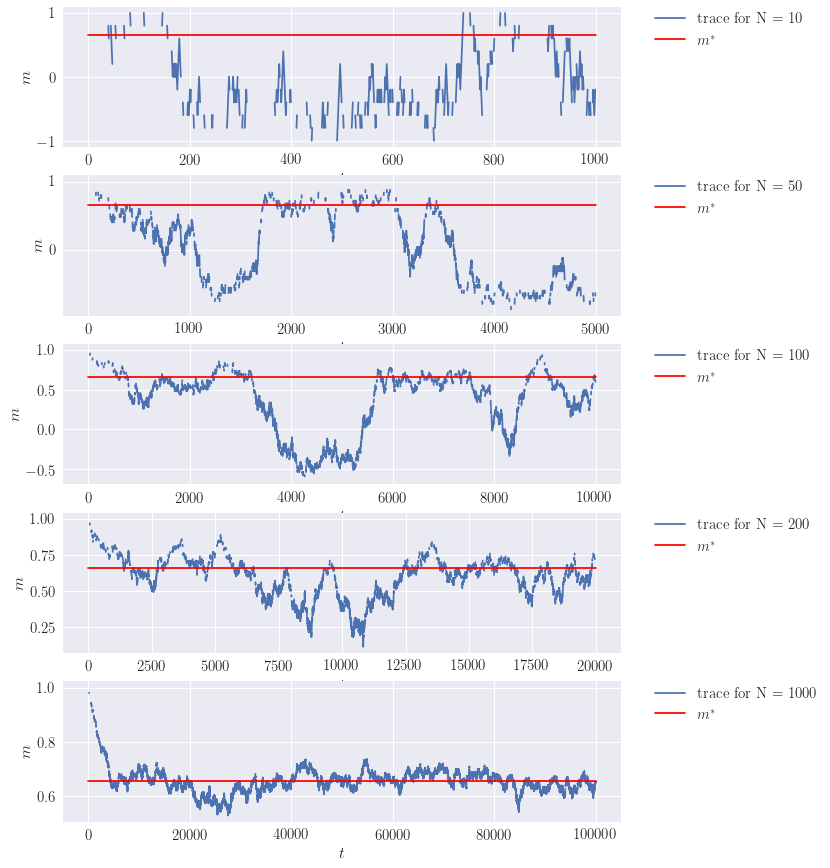

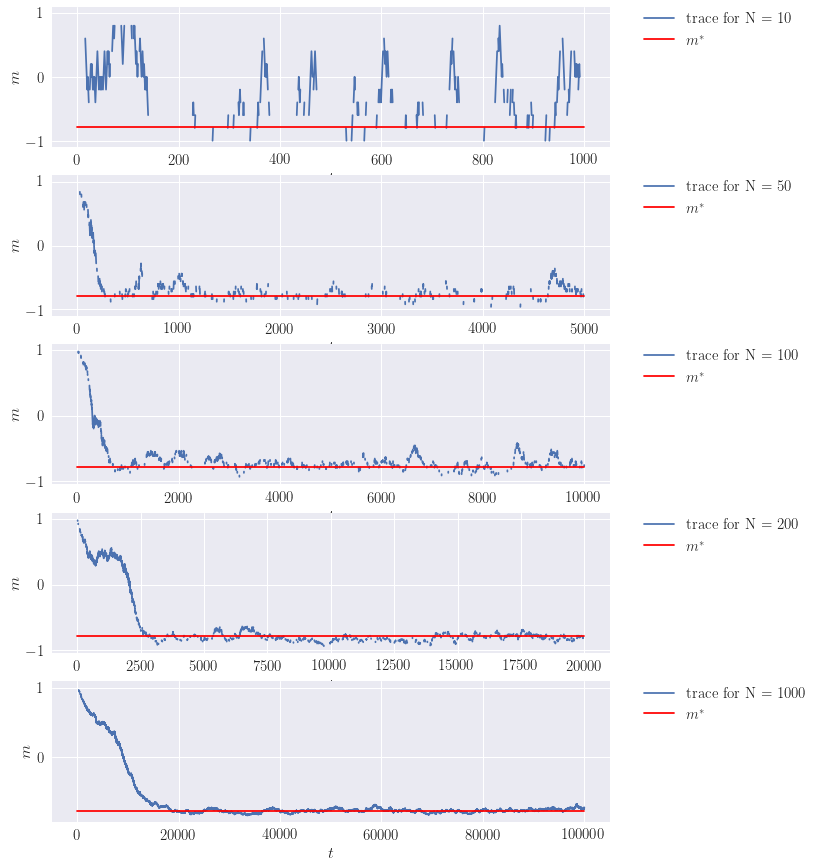

In [236]:
# Problem 3
def CW_simul(N, beta, h, t_max=None, S0=None):
    t_max, S = t_max or 100 * N, S0 or np.ones(N)
    delta_E = lambda S, k, h: -2 * S[k] * ( (S.sum()-S[k])/N + h )
    
    m = np.full(t_max, np.nan)
    for t in range(t_max):
        k, r = np.random.randint(0, N), np.random.uniform(0, 1)
        if r < np.exp(beta * delta_E(S, k, h)):
            S[k], m[t] = -S[k], S.mean()
    return m

beta, h, N_list = 1.2, 0, [10, 50, 100, 200, 1000]
plt.figure(figsize=(10,3*len(N_list)))
for i, N in enumerate(N_list, 1):
    m = CW_simul(N, beta, h)
    plt.subplot(len(N_list),1,i)
    plt.plot(m, label=r'trace for N = {0}'.format(N))
    plt.plot([0, m.size], find_m_star(beta, h) * np.array([1,1]), label=r'$m^*$', linestyle='-', color='red')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel(r'$t$')
    plt.ylabel(r'$m$')
plt.savefig('hw1_3(a).pdf', bbox_inches='tight')

beta, h, N_list = 1.2, -0.1, [10, 50, 100, 200, 1000]
plt.figure(figsize=(10,3*len(N_list)))
for i, N in enumerate(N_list, 1):
    m = CW_simul(N, beta, h)
    plt.subplot(len(N_list),1,i)
    plt.plot(m, label=r'trace for N = {0}'.format(N))
    plt.plot([0, m.size], find_m_star(beta, h) * np.array([1,1]), label=r'$m^*$', linestyle='-', color='red')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel(r'$t$')
    plt.ylabel(r'$m$')
plt.savefig('hw1_3(b).pdf', bbox_inches='tight')